In [11]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# GSP
data = np.empty((0,2), float)
for r in range(0,180,5):
    cmd = ('python auction.py --perms=1 --seed=2 --iters=20 --reserve='+str(r)+' Klczbb,5').split()
    out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE).communicate()
    rev = map(float,(out.split()[-2:-1]))
    row = np.array([.01 * r] + rev) # get triple of reserve, revenue, std-dev
    data = np.vstack((data, row))

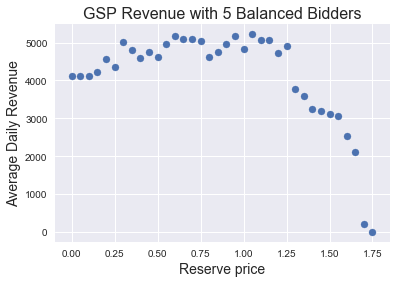

In [23]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel("Reserve price",fontsize=14)
plt.ylabel("Average Daily Revenue",fontsize=14)
plt.title("GSP Revenue with 5 Balanced Bidders",fontsize=16)

In [26]:
# VCG
vcg_data = np.empty((0,2), float)
for r in range(0,180,5):
    cmd = ('python auction.py --perms=1 --seed=2 --iters=20 --mech=vcg --reserve='+str(r)+' Truthful,5').split()
    out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE).communicate()
    rev = map(float,(out.split()[-2:-1]))
    row = np.array([.01 * r] + rev) # get triple of reserve, revenue, std-dev
    vcg_data = np.vstack((vcg_data, row))

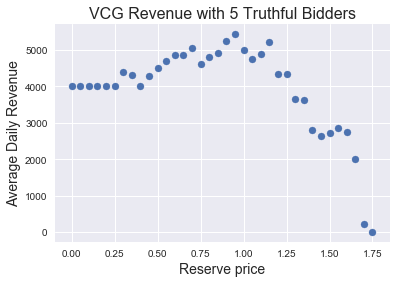

In [27]:
plt.scatter(vcg_data[:,0],vcg_data[:,1])
plt.xlabel("Reserve price",fontsize=14)
plt.ylabel("Average Daily Revenue",fontsize=14)
plt.title("VCG Revenue with 5 Truthful Bidders",fontsize=16)